1. Dependancy Installation

In [1]:
import sys
sys.path.append("../") # go to parent dir
from mrcnn_n import *
from mrcnn_n.visualize import random_colors, get_mask_contours, draw_mask
from mrcnn_n import *
import cv2
%matplotlib inline

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.0.0


## 2. Run Mask-RCNN on Images


In [3]:
# Load Image
# train_annotations_path = "../dataset/tb_dataset_v6/train.json"
# val_annotations_path = "../dataset/tb_dataset_v6/test.json"

# dataset_train = m_rcnn.load_image_dataset(os.path.join( train_annotations_path), "../dataset/tb_dataset_v6/train", "train")
# dataset_val = m_rcnn.load_image_dataset(os.path.join( val_annotations_path), "../dataset/tb_dataset_v6/test", "val")
# class_number = dataset_train.count_classes()

# print("Classes: {}".format(class_number))

In [4]:
import cv2
import numpy as np
from mrcnn_n.m_rcnn import load_inference_model
from skimage.color import rgb2gray
from skimage.filters import threshold_multiotsu
from skimage import data, io, img_as_ubyte
import matplotlib.pyplot as plt

path ="../test/tb/tb123.png"

image_output_path = "../assets/output/masdetection_image.png"
read_image = cv2.imread(path, 1)
print(read_image)

rgb2gray_image = rgb2gray(read_image)
threshold = threshold_multiotsu(rgb2gray_image, classes=5)

regions = np.digitize(rgb2gray_image, bins=threshold)

mas_image = img_as_ubyte(regions)
plt.imsave(image_output_path, mas_image)

from PIL import Image

image = Image.open("../assets/output/masdetection_image.png")
print(f"Original size : {image.size}") # 5464x3640

sunset_resized = image.resize((400, 400))
sunset_resized.save('sunset_400.png')

VERS 0.2
ok
[[[ 64  64  64]
  [ 67  67  67]
  [ 64  64  64]
  ...
  [108 108 108]
  [105 105 105]
  [106 106 106]]

 [[ 69  69  69]
  [ 69  69  69]
  [ 70  70  70]
  ...
  [113 113 113]
  [114 114 114]
  [114 114 114]]

 [[ 74  74  74]
  [ 72  72  72]
  [ 75  75  75]
  ...
  [114 114 114]
  [116 116 116]
  [117 117 117]]

 ...

 [[212 212 212]
  [218 218 218]
  [120 120 120]
  ...
  [177 177 177]
  [179 179 179]
  [184 184 184]]

 [[196 196 196]
  [220 220 220]
  [135 135 135]
  ...
  [176 176 176]
  [173 173 173]
  [181 181 181]]

 [[190 190 190]
  [221 221 221]
  [157 157 157]
  ...
  [176 176 176]
  [177 177 177]
  [169 169 169]]]
Original size : (353, 373)


In [5]:
path = "sunset_400.png"
img = cv2.imread(path)

test_model, inference_config = load_inference_model(1, "../model/tuberculosis/tb_model_v8.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loading weights from  ../model/tuberculosis/tb_model_v8.h5


cnt====> [array([[106,  98],
       [105,  98],
       [104,  98],
       [103,  98],
       [102,  98],
       [101,  98],
       [100,  98],
       [ 99,  98],
       [ 99,  97],
       [ 98,  97],
       [ 97,  97],
       [ 96,  97],
       [ 95,  97],
       [ 94,  97],
       [ 93,  97],
       [ 93,  96],
       [ 92,  96],
       [ 91,  96],
       [ 91,  95],
       [ 90,  95],
       [ 90,  94],
       [ 89,  94],
       [ 89,  93],
       [ 88,  93],
       [ 87,  93],
       [ 87,  92],
       [ 87,  91],
       [ 86,  91],
       [ 86,  90],
       [ 86,  89],
       [ 85,  89],
       [ 85,  88],
       [ 86,  87],
       [ 86,  87],
       [ 86,  86],
       [ 87,  85],
       [ 87,  85],
       [ 88,  84],
       [ 88,  84],
       [ 89,  83],
       [ 89,  83],
       [ 90,  82],
       [ 91,  82],
       [ 92,  82],
       [ 93,  82],
       [ 93,  82],
       [ 94,  81],
       [ 95,  81],
       [ 96,  81],
       [ 97,  81],
       [ 98,  81],
       [ 99,  81],
  

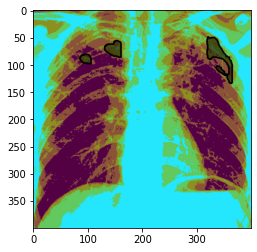

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
array=[]
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    # print("mask====>",mask)
    contours = get_mask_contours(mask)
    # print("contours====>",contours)
    array.append(contours)
    for cnt in contours:
        print("cnt====>",[cnt])
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
# cv2.Waitkey(10000)
# cv2.imshow("img",img)
plt.imsave("step1_lc_output.png", img)
plt.imshow(img)
plt.show()
print(array)
array = []

import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

numpyArrayOne = numpy.array([[11, 22, 33], [44, 55, 66], [77, 88, 99]])

# Serialization
numpyData = {"array": array}
encodedNumpyData = json.dumps(numpyData, cls=NumpyArrayEncoder)  # use dump() to write array into file
print("Printing JSON serialized NumPy array")
print(encodedNumpyData)

with open('output.json', 'w') as outfile:
    json.dump(encodedNumpyData, outfile)

# import json
# print("Decode JSON serialized NumPy array")
# decodedArrays = json.loads(encodedNumpyData)

with open('output.json') as json_file:
    data = json.load(json_file)
    decodedArrays = json.loads(data)
    finalNumpyArray = numpy.asarray(decodedArrays["array"])
    print("NumPy Array")
    print(finalNumpyArray)



In [7]:
#bulb cordinates
arr=[[150,0],[]]
# for k in range(len(arr)):
#     # print(arr[k])
json = []
#bulb cordinates populate
if(len(arr)>0):
    for l in range(len(arr)):
        #polygon array
        if(len(array)>0):
            for i in range(len(array)):
                for j in range(len(array[i])):
                    diff =[]
                    for k in range(len(array[i][j])):
                        # print(array[i][j][k])
                        #y value equalization
                        if(arr[l][1]== array[i][j][k][1]): 
                            print("check x value realte y==>",array[i][j][k])
                            diff.append(array[i][j][k])
                            # if(arr[l][0]== array[i][j][k][0]):
                            #     # print(arr[l])
                            #     json.append(arr[l])
                    print(len(diff)) 
                    if(len(diff)>0):
                        print(diff)   
                        lenght_diff = len(diff)
                        print(diff[0][0])
                        print(diff[lenght_diff-1][0]) 
                        if diff[0][0] <= arr[l][0] <= diff[lenght_diff-1][0]:
                            json.append(arr[l])    

               
#print("json==>",json)
#check duplicate cordinates
bulb_arr = []
for i in range(len(arr)):
    for j in range(len(json)):
        if(arr[i]==json[j]):
            bulb_arr.append(i)
            print(i)
                    
mylist = sorted(set(bulb_arr))
print(set(mylist))
        

set()


## 3. Model Accuracy

In [8]:
print(test_model.keras_model.summary())

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [9]:
# Running on 30 images. Increase for better accuracy.

from model_accuracy import *
model_accuracy(dataset_train, dataset_val, test_model, inference_config, modellib,utils)

ModuleNotFoundError: No module named 'model_accuracy'